In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#. Exploratory Data Analysis (EDA)

df=pd.read_csv("/content/Salary Prediction of Data Professions.csv")

In [ ]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [ ]:
df.dtypes

FIRST NAME           object
LAST NAME            object
SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

In [ ]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [ ]:
df.shape

(2639, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [ ]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [ ]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

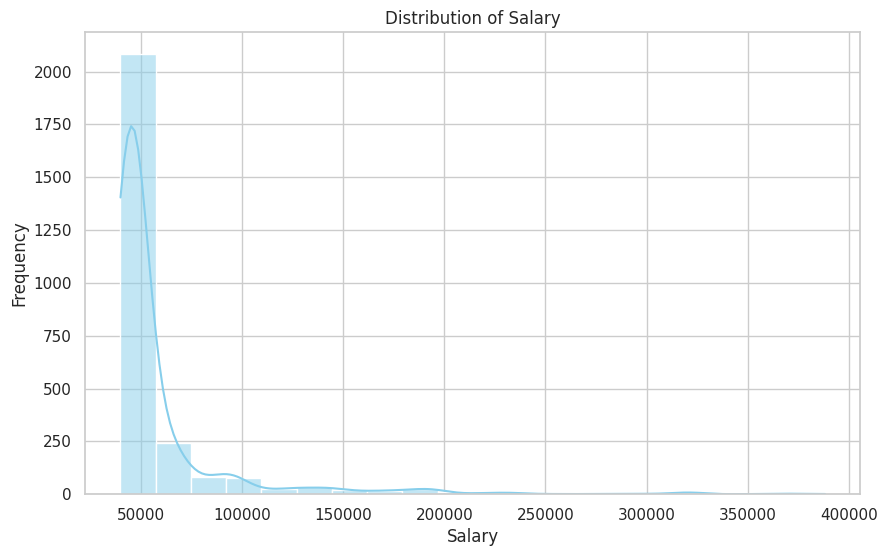

In [ ]:
#salary histogram

plt.figure(figsize=(10,6))
sns.histplot(df['SALARY'], bins=20, kde=True, color= 'skyblue')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

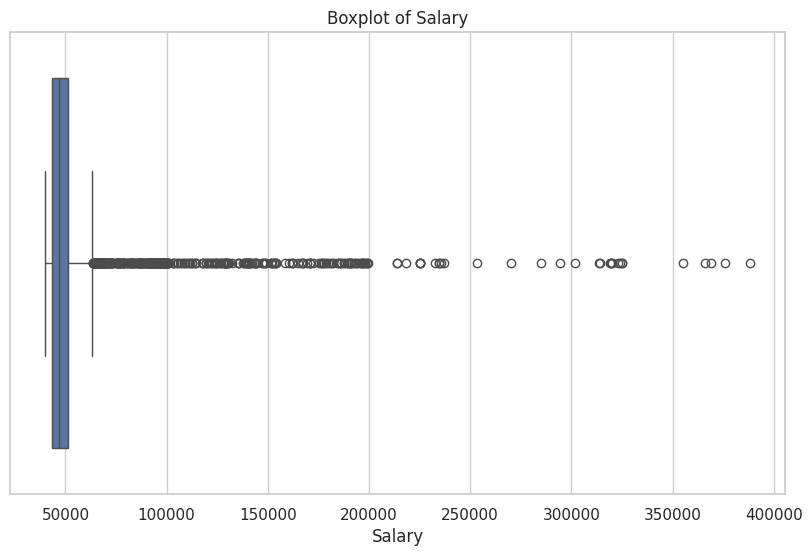

In [ ]:
#box plot for salary

plt.figure(figsize=(10,6))
sns.boxplot(x=df['SALARY'])
plt.title('Boxplot of Salary')
plt.xlabel('Salary')
plt.show()

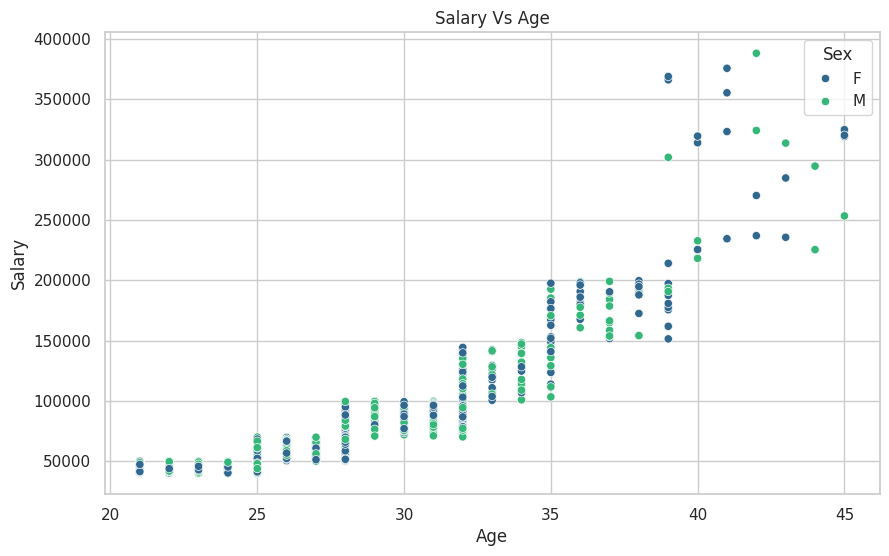

In [ ]:
#scatter plot for slary and age

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['AGE'], y=df['SALARY'], hue=df['SEX'], palette='viridis')
plt.title('Salary Vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Sex')
plt.show()

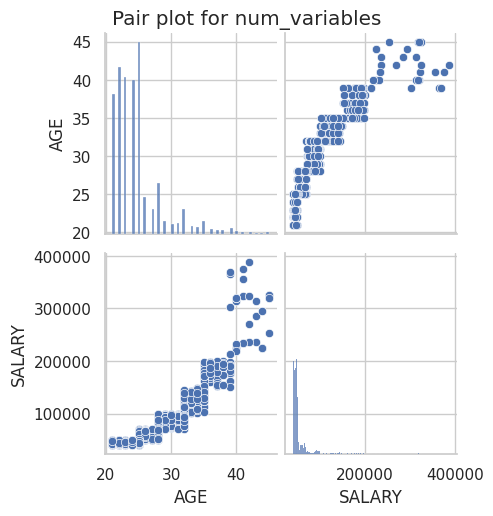

In [ ]:
#pair plot

numerical_columns=['AGE', 'SALARY', 'DESIGNATION']
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair plot for num_variables', y=1.02)
plt.show()

<ipython-input-18-21ea1b7b887d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df[numerical_columns].corr()


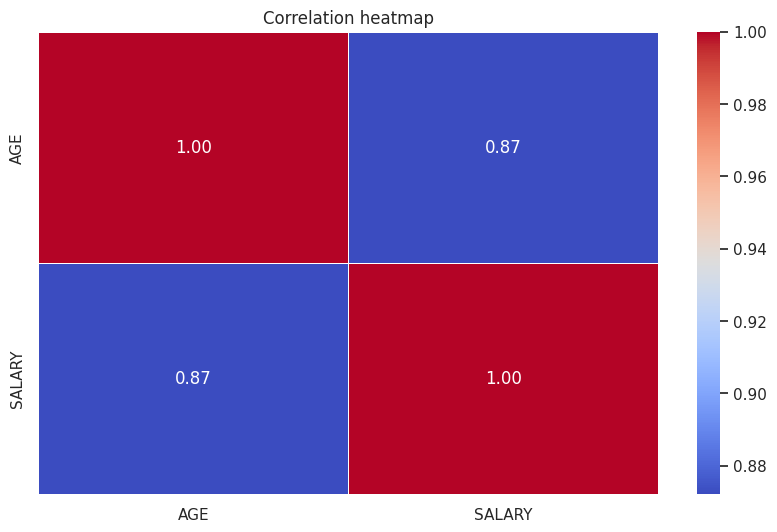

In [ ]:
#heat map to look correlation between num_variables

corr_matrix=df[numerical_columns].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=.5)
plt.title('Correlation heatmap')
plt.show()

In [ ]:
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

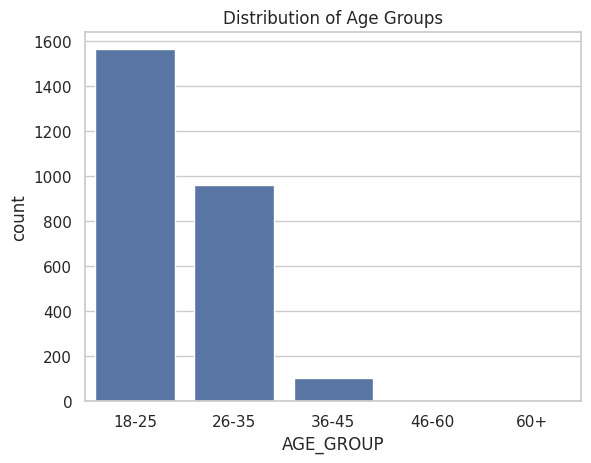

In [ ]:
#2. Feature Engineering

#Age group

bins=[18, 25, 35, 45, 60, 100]
labels=['18-25', '26-35', '36-45', '46-60', '60+']
df['AGE_GROUP']=pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

sns.countplot(x='AGE_GROUP', data=df)
plt.title('Distribution of Age Groups')
plt.show()

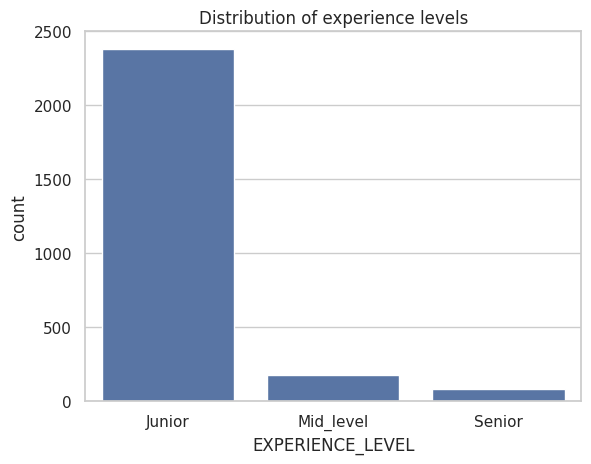

In [ ]:
#experience Level

experience_categories=['Junior', 'Mid_level', 'Senior']
bins=[0,5,10, float('inf')]
df['EXPERIENCE_LEVEL']=pd.cut(df['PAST EXP'], bins=bins, labels=experience_categories, right=False)

sns.countplot(x="EXPERIENCE_LEVEL", data=df, order=experience_categories)
plt.title("Distribution of experience levels")
plt.show()


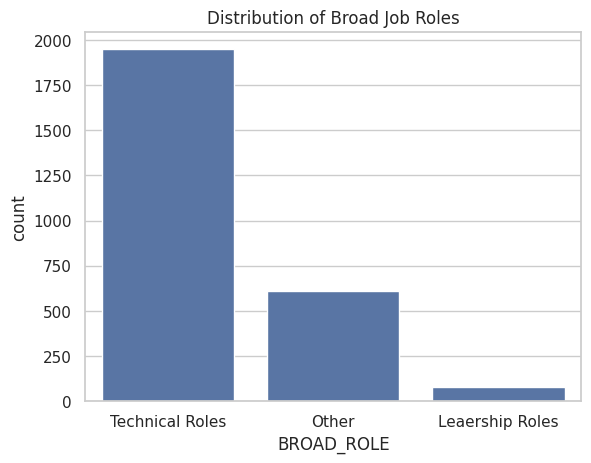

In [ ]:
#job role mapping

role_mapping={
    'Engineer': 'Technical Roles',
    'Manager' : 'Leaership Roles',
    'Analyst' : 'Technical Roles'
    }
df['BROAD_ROLE']= df['DESIGNATION'].map(role_mapping).fillna('Other')

sns.countplot(x="BROAD_ROLE", data=df)
plt.title(str("Distribution of Broad Job Roles"))
plt.show()

In [ ]:
#3. Data Preprocessing:

null_values=df.isnull().sum()
null_values

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
AGE_GROUP           3
EXPERIENCE_LEVEL    0
BROAD_ROLE          0
dtype: int64

In [ ]:
df=df.dropna(subset=['LAST NAME'])

df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['LEAVES USED'].fillna(df['LEAVES USED'].mean(), inplace=True)
df['RATINGS'].fillna(df['RATINGS'].mean(), inplace=True)
df['LEAVES REMAINING'].fillna(df['LEAVES REMAINING'].mean(),inplace=True)
df['AGE_GROUP'].fillna(df['AGE_GROUP'].mode().iloc[0], inplace=True)

<ipython-input-24-b69eb6bca755>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AGE'].fillna(df['AGE'].mean(), inplace=True)
<ipython-input-24-b69eb6bca755>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LEAVES USED'].fillna(df['LEAVES USED'].mean(), inplace=True)
<ipython-input-24-b69eb6bca755>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RATINGS'].fillna(df['RATINGS'].mean(), inplace=True)
<ipython-input-24-b69eb6b

In [ ]:
null_values=df.isnull().sum()
null_values

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
AGE_GROUP           0
EXPERIENCE_LEVEL    0
BROAD_ROLE          0
dtype: int64

In [ ]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,AGE_GROUP,EXPERIENCE_LEVEL,BROAD_ROLE
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.000000,44570,Finance,24.0,6.0,2.000000,0,18-25,Junior,Technical Roles
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.000000,40955,Finance,23.0,7.0,3.000000,0,18-25,Junior,Technical Roles
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.000000,45550,IT,22.0,8.0,3.000000,0,18-25,Junior,Technical Roles
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,24.757495,43161,Operations,27.0,3.0,3.485964,3,18-25,Junior,Technical Roles
6,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22.000000,40339,Marketing,19.0,11.0,5.000000,0,18-25,Junior,Technical Roles


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
selected_columns=['SEX', 'DESIGNATION', 'AGE', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']
X=df[selected_columns]
y = df['SALARY']

# Encoding
X_encoded = pd.get_dummies(X, columns=['SEX', 'DESIGNATION', 'UNIT'], prefix=['SEX', 'DESIGNATION', 'UNIT'])

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [ ]:
#LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions=linear_model.predict(X_test)

In [ ]:
#RandomForestRegression
rf_model=RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions=rf_model.predict(X_test)

In [ ]:
#DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_predictions=dt_model.predict(X_test)

In [ ]:
#GradientBoostingRegressor

gb_model=GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_predictions=gb_model.predict(X_test)

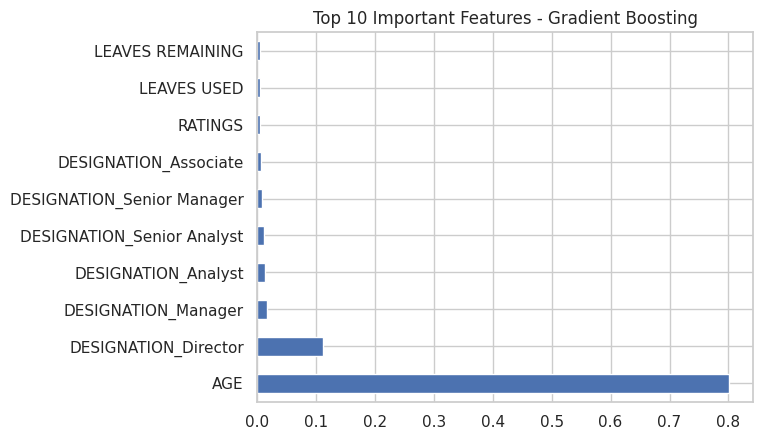

In [ ]:
#Fature Importance for Gradient Boosting
feature_importance_gb=pd.Series(gb_model.feature_importances_,index=X_encoded.columns)
feature_importance_gb.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features - Gradient Boosting")
plt.show()

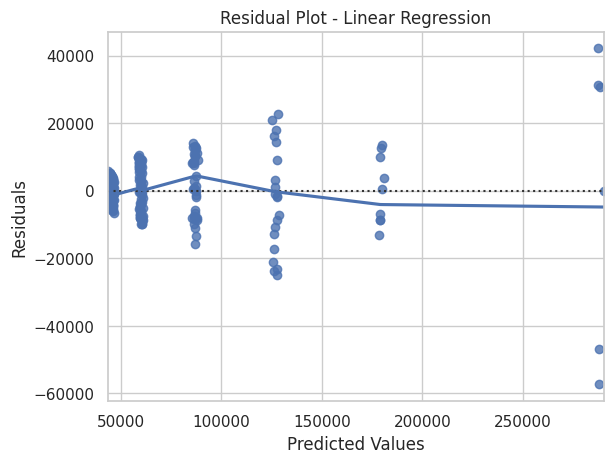

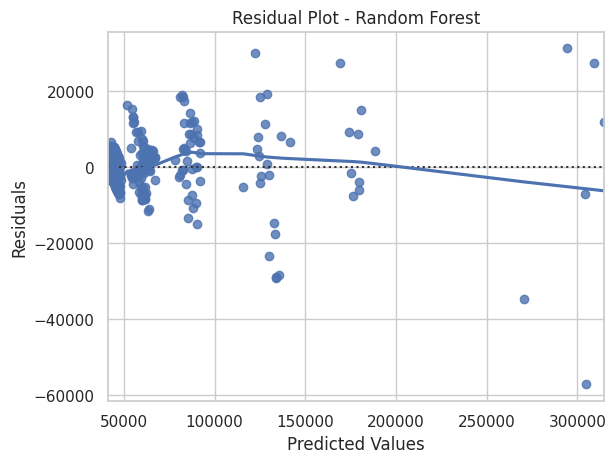

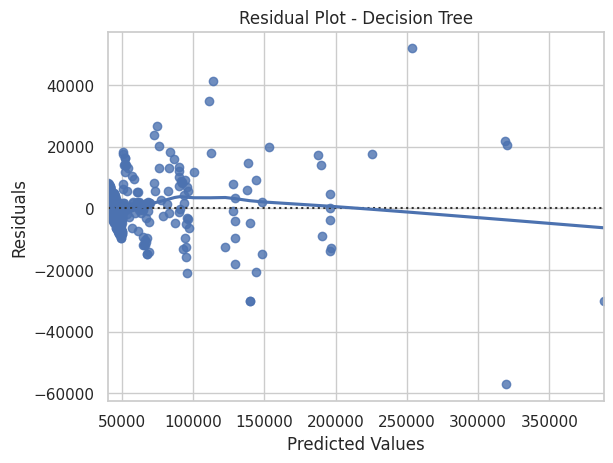

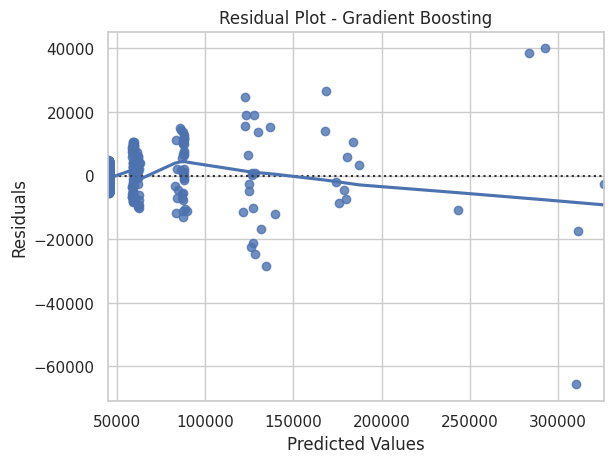

In [ ]:
# Residual plots for each model
#A residual plot shows how far off the predictions are from the actual data points.

# Residual plots for each model
models = [linear_model, rf_model, dt_model, gb_model]
model_names = ['Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting']

for model, name in zip(models, model_names):

    predictions=model.predict(X_test)

    residuals=y_test - predictions

    sns.residplot(x=predictions, y=residuals, lowess=True, color="b")

    plt.title(f'Residual Plot - {name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()


In [ ]:
#Model evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

linear_mae=mean_absolute_error(y_test, linear_predictions)
rf_mae=mean_absolute_error(y_test, rf_predictions)
dt_mae=mean_absolute_error(y_test, dt_predictions)
gb_mae=mean_absolute_error(y_test, gb_predictions)

In [ ]:
linear_mse=mean_squared_error(y_test, linear_predictions)
rf_mse=mean_squared_error(y_test, rf_predictions)
dt_mse=mean_squared_error(y_test, dt_predictions)
gb_mse=mean_squared_error(y_test, gb_predictions)

In [ ]:
linear_rmse=np.sqrt(linear_mse)
rf_rmse=np.sqrt(rf_mse)
dt_rmse=np.sqrt(dt_mse)
gb_rmse=np.sqrt(gb_mse)

In [ ]:
linear_r2=r2_score(y_test,linear_predictions)
rf_r2=r2_score(y_test, rf_predictions)
dt_r2=r2_score(y_test, dt_predictions)
gb_r2=r2_score(y_test, gb_predictions)

In [ ]:
# Print or visualize the results
print("Mean Absolute Error:")
print(f"Linear Regression: {linear_mae}")
print(f"Random Forest: {rf_mae}")
print(f"Decision Tree: {dt_mae}")
print(f"Gradient Boosting: {gb_mae}")
print("\n")

print("Mean Squared Error:")
print(f"Linear Regression: {linear_mse}")
print(f"Random Forest: {rf_mse}")
print(f"Decision Tree: {dt_mse}")
print(f"Gradient Boosting: {gb_mse}")
print("\n")

print("Root Mean Squared Error:")
print(f"Linear Regression: {linear_rmse}")
print(f"Random Forest: {rf_rmse}")
print(f"Decision Tree: {dt_rmse}")
print(f"Gradient Boosting: {gb_rmse}")
print("\n")

print("R-squared (R2) Score:")
print(f"Linear Regression: {linear_r2}")
print(f"Random Forest: {rf_r2}")
print(f"Decision Tree: {dt_r2}")
print(f"Gradient Boosting: {gb_r2}")

Mean Absolute Error:
Linear Regression: 4218.819449522437
Random Forest: 3925.6415647376084
Decision Tree: 4732.530776515152
Gradient Boosting: 4159.003847979167


Mean Squared Error:
Linear Regression: 46671614.88501536
Random Forest: 46142521.066416614
Decision Tree: 72983528.55201757
Gradient Boosting: 45969804.54363369


Root Mean Squared Error:
Linear Regression: 6831.662673538219
Random Forest: 6792.828649864253
Decision Tree: 8543.039772353724
Gradient Boosting: 6780.103579122791


R-squared (R2) Score:
Linear Regression: 0.9613939584159525
Random Forest: 0.9618316166802532
Decision Tree: 0.9396291483555599
Gradient Boosting: 0.961974485129893
